In [46]:

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weatherAUS = pd.read_csv('weatherAUS.csv')
#оставлю только нужные столбцы
weatherAUS = weatherAUS[['Date','Location','MinTemp','MaxTemp','Rainfall','Sunshine','WindGustDir','WindGustSpeed']]
#Добавою год
weatherAUS['Year'] = pd.to_datetime(weatherAUS['Date']).dt.year
weatherAUS['Month'] = pd.to_datetime(weatherAUS['Date']).dt.month
weatherAUS.fillna(0)
# weatherAUS

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,0.0,W,44.0,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,0.0,WNW,44.0,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,0.0,WSW,46.0,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,0.0,NE,24.0,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,0.0,W,41.0,2008,12
...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,0.0,E,31.0,2017,6
142189,2017-06-21,Uluru,2.8,23.4,0.0,0.0,E,31.0,2017,6
142190,2017-06-22,Uluru,3.6,25.3,0.0,0.0,NNW,22.0,2017,6
142191,2017-06-23,Uluru,5.4,26.9,0.0,0.0,N,37.0,2017,6


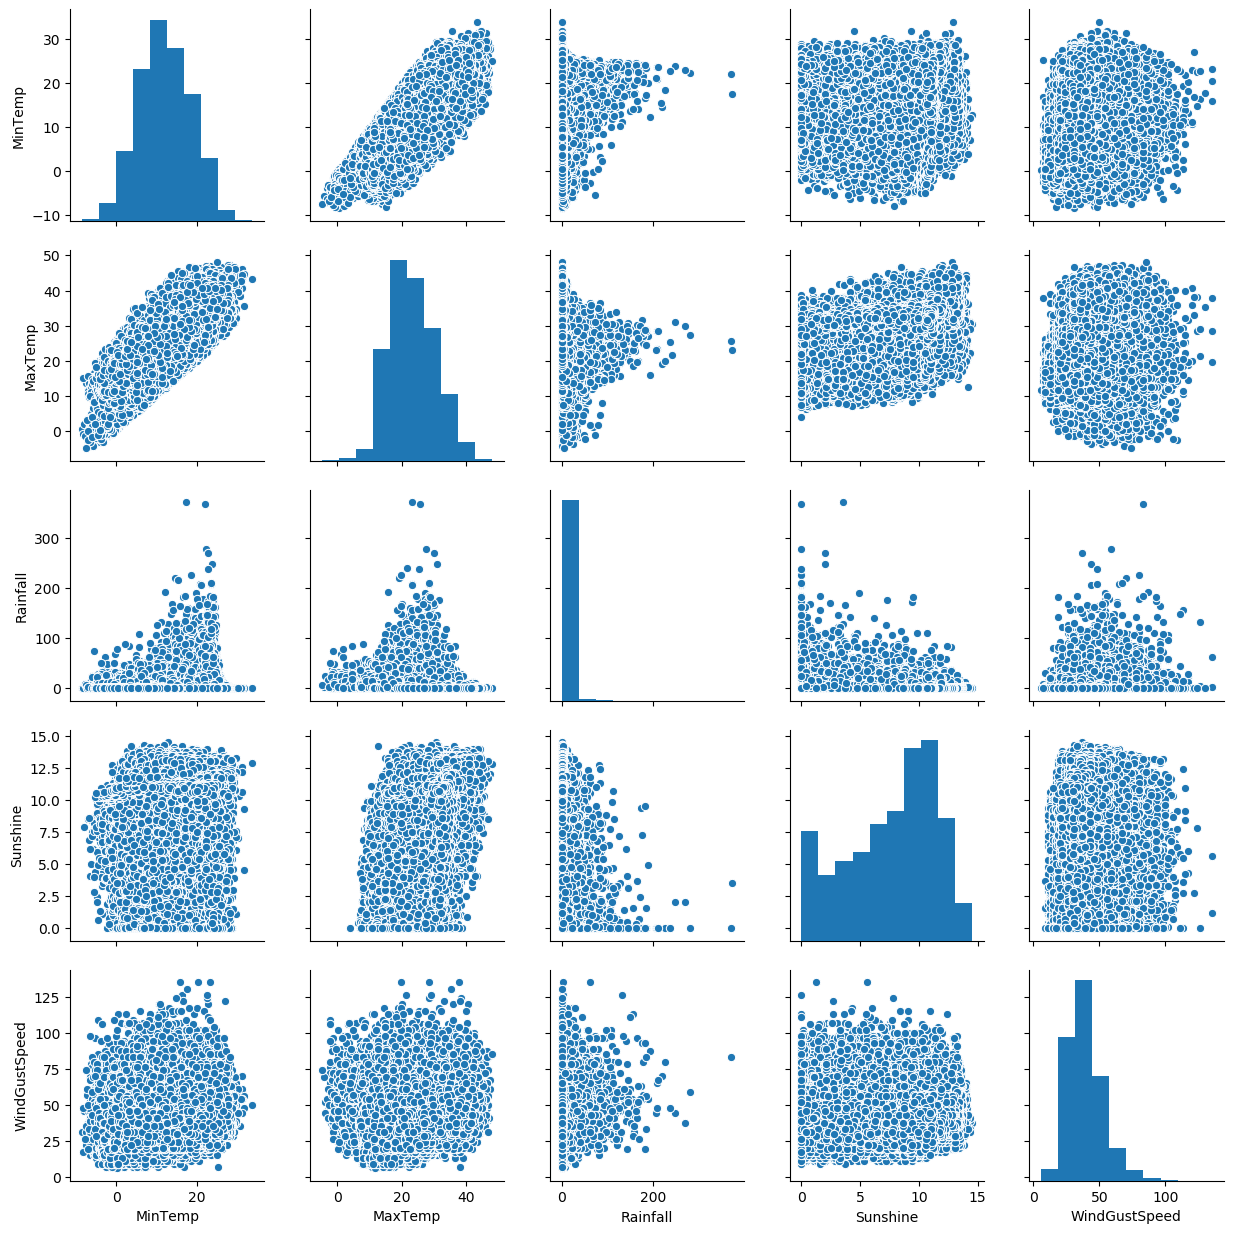

In [77]:
cols = ['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustDir','WindGustSpeed']
sns_plot = sns.pairplot(weatherAUS[cols])

plt.show()

[Text(0, 0, '1')]

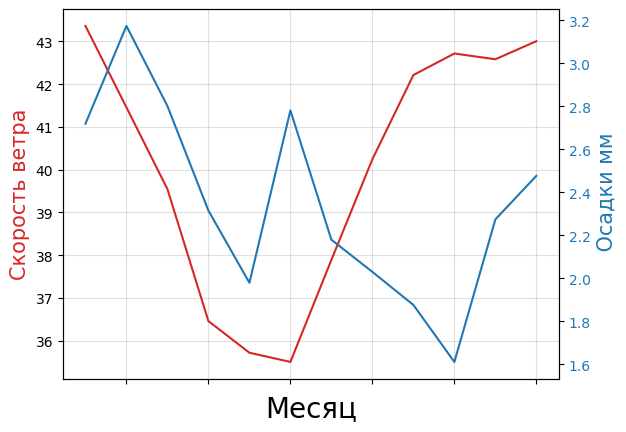

In [150]:
x = WindGustSpeed['Month']
y1 = WindGustSpeed['WindGustSpeed']
y2 = WindGustSpeed['Rainfall']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='tab:red')

ax2 = ax1.twinx() 
ax2.plot(x, y2, color='tab:blue')

ax1.set_xlabel('Месяц', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Скорость ветра', color='tab:red', fontsize=15)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel(" Осадки мм", color='tab:blue', fontsize=15)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})


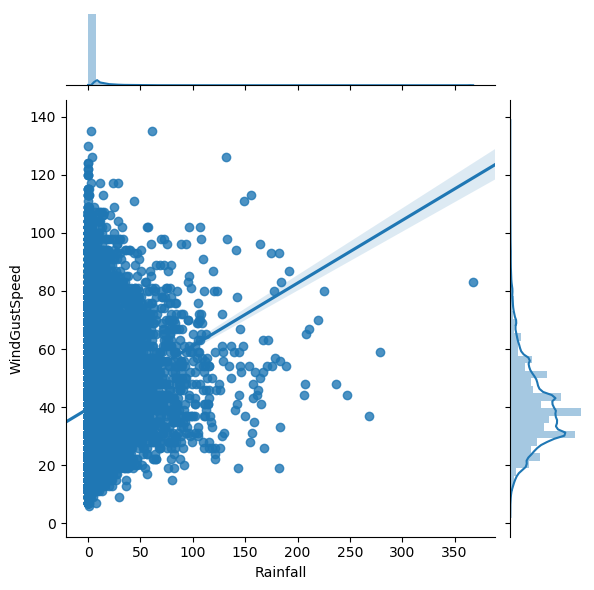

In [65]:
sns.jointplot(weatherAUS['Rainfall'],weatherAUS['WindGustSpeed'], kind='reg')
plt.show()

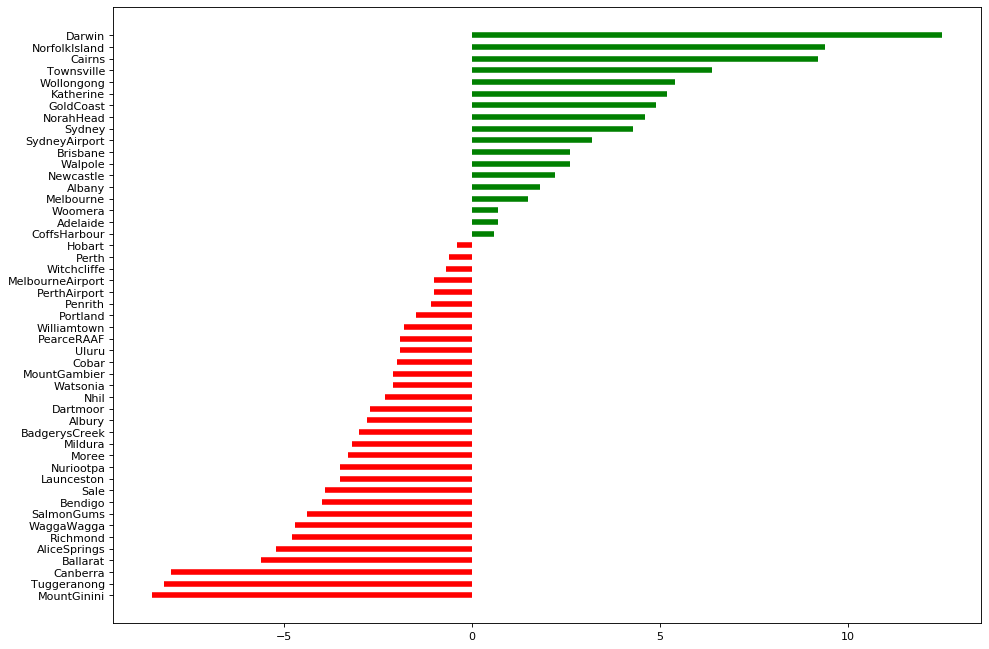

In [81]:
#посмотрим минимальную температуру по регионам
mintemp  = weatherAUS.groupby('Location')[['MinTemp']].min().sort_values('MinTemp')
mintemp['colors'] = ['red' if x < 0 else 'green' for x in mintemp['MinTemp']]
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=mintemp.index, xmin=0, xmax=mintemp['MinTemp'], color=mintemp['colors'], linewidth=5)

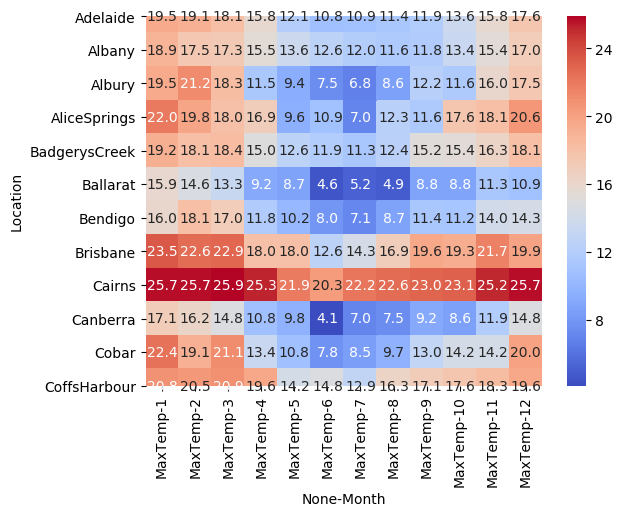

In [78]:
#Тепловая карта максимальных температур по регионам помесячно
mintemp_loc = weatherAUS.groupby(['Month','Location'])['MaxTemp'].min().to_frame().unstack('Month').head(12)
heat_map = sns.heatmap(mintemp_loc, annot=True, fmt=".1f",  cmap='coolwarm')

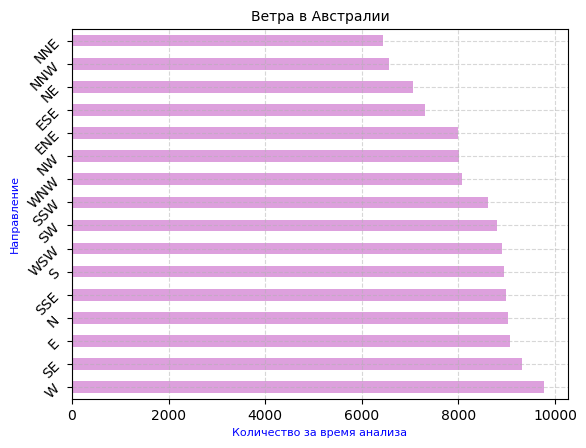

In [151]:
#посмотрим какие ветра чаще дуют в Австралии
WindGustDir = weatherAUS.WindGustDir.value_counts().plot(kind='barh', rot=45, stacked=True, align='center',
        color='Plum')
plt.title('Ветра в Австралии', fontsize=10)
plt.xlabel('Количество за время анализа', fontsize=8, color='blue')
plt.ylabel('Направление', fontsize=8, color='blue')
plt.grid(linestyle='--', alpha=0.5)



In [149]:
mintemp = weatherAUS.groupby(['Month','Year'])['MinTemp'].min().to_frame().unstack('Year').fillna(0).reset_index()

mintemp

# plt.xlabel('Месяц')
# plt.ylabel('Минимальная температура')
# plt.title('Динамика температур по годам')
# plt.grid(True)

# plt.plot(mintemp['Month'], mintemp['Year'])


Month MinTemp                                                  
Year          2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
0        1     0.0  9.9  0.7 -0.6  4.1 -1.3  0.7  2.1  0.8 -0.5  4.4
1        2     0.0  7.7  1.0  3.8  0.9  4.1  0.0  0.9  3.7  3.0 -1.6
2        3     0.0  4.2  0.8  1.6  1.6 -1.0  0.6  1.2 -0.8  0.0 -1.1
3        4     0.0 -2.1 -5.0 -2.6  0.0 -4.5 -1.9 -0.5 -1.9  1.2 -4.6
4        5     0.0 -2.7 -2.3 -4.8 -6.9 -5.0 -4.6 -3.7 -5.8 -4.5 -5.9
5        6     0.0 -1.5 -8.5 -8.0 -5.6 -6.3 -5.5 -5.1 -7.0 -7.8 -5.8
6        7     0.0 -3.5 -5.1 -5.3 -8.2 -6.2 -6.0 -6.7 -7.0 -7.5  0.0
7        8     0.0 -5.3 -6.3 -7.1 -5.0 -6.6 -6.5 -7.6 -8.2 -5.4  0.0
8        9     0.0 -3.7 -6.1 -5.3 -6.6 -6.8 -6.3 -5.4 -6.0 -3.2  0.0
9       10     0.0  0.3 -3.6 -5.5 -3.4 -4.5 -5.0 -4.4 -2.0 -4.8  0.0
10      11     6.1  4.3 -0.5 -0.8  0.8 -1.5 -4.8 -4.5 -1.1 -2.5  0.0
11      12     7.5 -1.0 -1.7 -1.3 -3.0  0.0 -2.5  2.3  1.0  1.1  0.0